# Initial Steps

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Allot\wooden\cleaned_monthly_wooden_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-11-01     69342
2019-12-01    116044
2020-01-01    131149
2020-02-01    122010
2020-03-01    113593
2020-04-01    109791
2020-05-01     65443
2020-06-01    106328
2020-07-01     89661
2020-08-01    132232
2020-09-01    161498
2020-10-01    136698
2020-11-01    118348
2020-12-01    165051
2021-01-01    180156
2021-02-01    171017
2021-03-01    162600
2021-04-01    158797
2021-05-01    114449
2021-06-01    155335
2021-07-01    138668
2021-08-01    181238
2021-09-01    210505
2021-10-01    185704
2021-11-01    167355
2021-12-01    214057
2022-01-01    229162
2022-02-01    220023
2022-03-01    211606
2022-04-01    207804
2022-05-01    163456
2022-06-01    204342
2022-07-01    187674
2022-08-01    230245
2022-09-01    259512
2022-10-01    234711
2022-11-01    216362

# Preparing Data For Data Driven Forecasting

## Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing

## Creating MAPE Function

In [3]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Splitting Data

In [4]:
Train = df.drop(df.tail(12).index)
Train

quantity
date                
2019-11-01     69342
2019-12-01    116044
2020-01-01    131149
2020-02-01    122010
2020-03-01    113593
2020-04-01    109791
2020-05-01     65443
2020-06-01    106328
2020-07-01     89661
2020-08-01    132232
2020-09-01    161498
2020-10-01    136698
2020-11-01    118348
2020-12-01    165051
2021-01-01    180156
2021-02-01    171017
2021-03-01    162600
2021-04-01    158797
2021-05-01    114449
2021-06-01    155335
2021-07-01    138668
2021-08-01    181238
2021-09-01    210505
2021-10-01    185704
2021-11-01    167355

In [5]:
Test = df.tail(12)
Test

quantity
date                
2021-12-01    214057
2022-01-01    229162
2022-02-01    220023
2022-03-01    211606
2022-04-01    207804
2022-05-01    163456
2022-06-01    204342
2022-07-01    187674
2022-08-01    230245
2022-09-01    259512
2022-10-01    234711
2022-11-01    216362

# Model Building

## 1. Moving Average

In [6]:
# Moving Average for the time series
mv_pred = df["quantity"].rolling(12).mean()
mv_pred.tail(12)
MAPE(mv_pred.tail(12), Test.quantity)

13.178611398428353

## 2. Simple Exponential Smoothing

In [7]:
ses_model = SimpleExpSmoothing(Train["quantity"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses, Test.quantity)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


18.861921497576912

## 3. Holt's method 

In [8]:
hw_model = Holt(Train["quantity"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hw, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


22.02018130636239

## 4. Holts Winter Exponential Smoothing with Additive Seasonality & Additive Trend

In [9]:
hwe_model_add_add = ExponentialSmoothing(Train["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_add_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


4.537740339685731

## 5. Holts Winter Exponential Smoothing with Multiplicative Seasonality & Additive Trend

In [10]:
hwe_model_mul_add = ExponentialSmoothing(Train["quantity"], seasonal = "mul", trend = "add", seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwe_mul_add, Test.quantity) 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


6.688435394937663

# Forecasting

## 1. Getting Data For Forecasting

In [11]:
forecast_data_path = "C:/Users/hp/Downloads/1111/Allot/wooden/wooden_data_to_forecast.csv"

In [12]:
df2 = pd.read_csv(forecast_data_path, parse_dates=['date'])
df2 = df2.set_index('date')
df2

Empty DataFrame
Columns: []
Index: [2022-12-01 00:00:00, 2023-01-01 00:00:00, 2023-02-01 00:00:00, 2023-03-01 00:00:00, 2023-04-01 00:00:00, 2023-05-01 00:00:00, 2023-06-01 00:00:00, 2023-07-01 00:00:00, 2023-08-01 00:00:00, 2023-09-01 00:00:00, 2023-10-01 00:00:00, 2023-11-01 00:00:00]

## 3. Best Model

In [13]:
model_full = ExponentialSmoothing(df["quantity"], seasonal = "add", trend = "add", seasonal_periods = 12).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [14]:
model_full.save("model.pickle")

In [15]:
# to load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

## 4. Forecasting

In [16]:
pred_new = pd.Series(model_full.predict(start = df2.index[0], end = df2.index[-1]))
pred_new

2022-12-01    262996.062624
2023-01-01    276874.232237
2023-02-01    266496.318639
2023-03-01    256840.588557
2023-04-01    251798.951179
2023-05-01    206212.116070
2023-06-01    245858.902016
2023-07-01    227952.782614
2023-08-01    269284.367210
2023-09-01    297311.950645
2023-10-01    271272.331095
2023-11-01    250425.001206
Freq: MS, dtype: float64

In [17]:
df2["forecasted_quantity"] = pd.Series(pred_new)
df2

forecasted_quantity
date                           
2022-12-01        262996.062624
2023-01-01        276874.232237
2023-02-01        266496.318639
2023-03-01        256840.588557
2023-04-01        251798.951179
2023-05-01        206212.116070
2023-06-01        245858.902016
2023-07-01        227952.782614
2023-08-01        269284.367210
2023-09-01        297311.950645
2023-10-01        271272.331095
2023-11-01        250425.001206

## 5. Finding Residuals

In [18]:
full_res = df.quantity - model_full.predict(start = df.index[0], end = df.index[-1])
full_res

date
2019-11-01   -20789.312595
2019-12-01     -611.119959
2020-01-01     1218.255726
2020-02-01     1280.003806
2020-03-01     1281.365131
2020-04-01     1282.192973
2020-05-01     1281.293237
2020-06-01     1280.528953
2020-07-01     1281.292732
2020-08-01     1281.495312
2020-09-01     1280.383352
2020-10-01     1281.434241
2020-11-01     2540.737125
2020-12-01       65.238545
2021-01-01     1234.777418
2021-02-01     1279.002670
2021-03-01     1279.916960
2021-04-01     1279.732168
2021-05-01     1279.804437
2021-06-01     1280.069438
2021-07-01     1279.862252
2021-08-01     1279.036424
2021-09-01     1279.895435
2021-10-01     1279.002919
2021-11-01     2538.546595
2021-12-01       66.103847
2022-01-01     1231.807820
2022-02-01     1277.438724
2022-03-01     1278.454118
2022-04-01     1279.273997
2022-05-01     1278.376276
2022-06-01     1278.611879
2022-07-01     1277.404579
2022-08-01     1278.549635
2022-09-01     1278.465885
2022-10-01     1277.547420
2022-11-01     2535.386

## 6. ACF Plot on Residuals

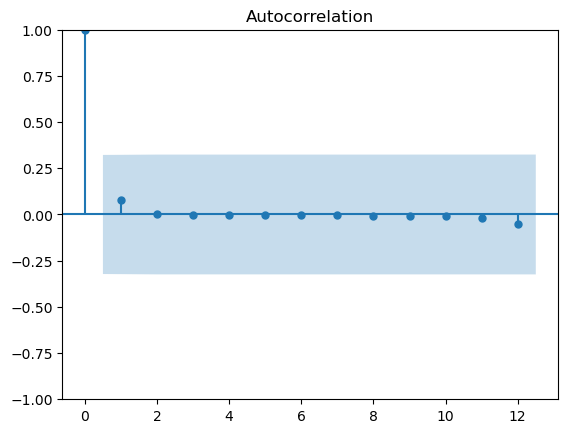

In [19]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12);

## 7. PACF Plot on Residuals

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


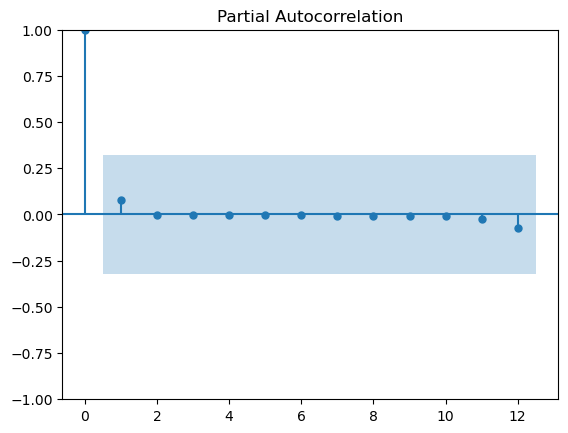

In [20]:
tsa_plots.plot_pacf(full_res, lags=12);

## 8. Autoregression Model

In [21]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[11])
# model_ar = AutoReg(Train_res, lags=5)
model_fit = model_ar.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [22]:
print('Coefficients: %s' % model_fit.params)
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(df2)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)
pred_res

Coefficients: const    1330.651850
y.L11      -0.008859
dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


0     1319.739612
1     1319.335381
2     1319.326386
3     1319.319122
4     1319.327075
5     1319.324988
6     1319.335683
7     1319.325539
8     1319.326281
9     1319.334418
10    1308.191575
11    1318.960649
dtype: float64

In [23]:
df3 = pd.concat([df2.reset_index(), pred_res], axis=1)
df3 = df3.set_index('date')
df3 = df3.rename(columns = {0:'Residuals'})
df3

forecasted_quantity    Residuals
date                                        
2022-12-01        262996.062624  1319.739612
2023-01-01        276874.232237  1319.335381
2023-02-01        266496.318639  1319.326386
2023-03-01        256840.588557  1319.319122
2023-04-01        251798.951179  1319.327075
2023-05-01        206212.116070  1319.324988
2023-06-01        245858.902016  1319.335683
2023-07-01        227952.782614  1319.325539
2023-08-01        269284.367210  1319.326281
2023-09-01        297311.950645  1319.334418
2023-10-01        271272.331095  1308.191575
2023-11-01        250425.001206  1318.960649

In [24]:
df3['final_forecast'] = df3['Residuals'] + df3['forecasted_quantity']
df3

forecasted_quantity    Residuals  final_forecast
date                                                        
2022-12-01        262996.062624  1319.739612   264315.802236
2023-01-01        276874.232237  1319.335381   278193.567617
2023-02-01        266496.318639  1319.326386   267815.645025
2023-03-01        256840.588557  1319.319122   258159.907679
2023-04-01        251798.951179  1319.327075   253118.278254
2023-05-01        206212.116070  1319.324988   207531.441058
2023-06-01        245858.902016  1319.335683   247178.237700
2023-07-01        227952.782614  1319.325539   229272.108154
2023-08-01        269284.367210  1319.326281   270603.693491
2023-09-01        297311.950645  1319.334418   298631.285063
2023-10-01        271272.331095  1308.191575   272580.522669
2023-11-01        250425.001206  1318.960649   251743.961855

# Forecasting Result

<AxesSubplot:xlabel='date'>

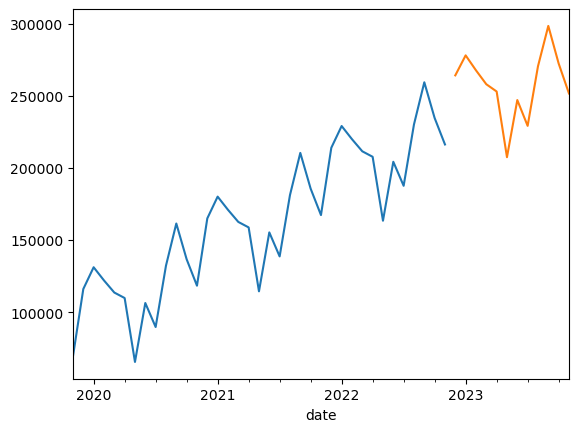

In [25]:
df.quantity.plot()
df3.final_forecast.plot()

# Saving Forecasted Data

In [26]:
df3.to_csv('data_driven_Forecasted_Data.csv',encoding='utf-8')
import os
os.getcwd()

'C:\\Users\\hp\\Downloads\\1111\\Allot\\wooden\\Data_Driven_forecasting'